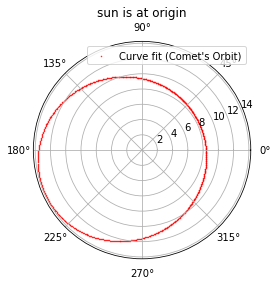

Comet's path was an ellipse as e < 1
eccentricity = 0.25781192967509065
semi major axis = 11.098669049584581 AU
time period = 36.999742252115624 Years


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sin, cos, pi, atan, sqrt
import pandas as pd


# Reaing the csv file
data_base = pd.read_csv("CometData.csv")

d = data_base['Distance from earth(AU)'].tolist()
angle = data_base['Angle between comet and sun(radians)'].tolist()
time = data_base['# Time(in years)'].tolist()


# making Supplementary angles
alpha = []
counter = 0
for i in angle:
    alpha.append(pi - angle[counter])
    counter += 1

# Finding polar angles with respect to sun 
polar_theta = []

counter_1 = 0
for t in time:
    polar_theta.append(2 * pi * t + atan(d[counter_1] * sin(alpha[counter_1]/(1 + d[counter_1] * cos(alpha[counter_1])))))
    counter_1 += 1
    
# Finding radial positions with respect to sun
polar_r = []
counter_2 =0
for t in time:
    polar_r.append(sqrt(1 + 2 * d[counter_2] * cos(alpha[counter_2]) + (d[counter_2])**2))
    counter_2 += 1
    
# curve fitting

def r(theta, e, r_not, theta_not):
    return r_not/(1 + e * np.cos(theta-theta_not))


# plt.polar(polar_theta, polar_r, label="Experimental data")

popt, pcov = curve_fit(r, polar_theta, polar_r)

# plotting the scatter curve
fig = plt.figure()

ax = fig.add_subplot(projection='polar')

x_ax = np.arange(0, 2 * pi, 0.01)

ax.scatter(x_ax, r(x_ax, *popt), label="Curve fit (Commet's Orbit)", color='red', s=0.2)

plt.title("sun is at origin")
plt.legend()
plt.show()

print("Commet's path was an ellipse as e < 1")

# finding eccentricity, time period, semi-major axis of commet's elliptical path

e = popt[0]
r_not = popt[1]
theta_not = [2]

const = 1/0.9986546   # 4 * pi^2 / GM

semi_major_axis = r_not/(1 - e**2)

time_period = sqrt(semi_major_axis**3 * (const))

print(f"eccentricity = {e}")
print(f"semi major axis = {semi_major_axis} AU")
print(f"time period = {time_period} Years")
